### BA2B : Find a Median String

In [63]:
l = 3
dnas = ['AAATTGACGCAT','GACGACCACGTT','CGTCAGCGCCTG',
'GCTGAGCACCGG','AGTACGGGACAG']


kmers = []

def createKmers(kmer):
    if len(kmer) == l:
        kmers.append(kmer)
        return
    createKmers(kmer+'A')
    createKmers(kmer+'C')
    createKmers(kmer+'G')
    createKmers(kmer+'T')


createKmers("")

# print(len(kmers))

def hamming(dna,kmer):
    total = 0
    for i in range(len(dna)):
        if dna[i] != kmer[i]:
            total += 1
    return total

def findMedian(kmer):
    total = 0

    for dna in dnas:
        gmax = float("inf")
        for i in range(len(dna)-len(kmer)+1):
            subdna = dna[i:i+len(kmer)]
            distance = hamming(subdna,kmer)
            if distance < gmax :
                gmax = distance
        total += gmax
    return total

global_max = float("inf")
result = ""

for kmer in kmers:
    total = findMedian(kmer)
    if total < global_max:
        global_max = total
        result = kmer

print(result)

ACG


### BA2C : Find a Profile-most Probable k-mer in a String

<BarContainer object of 46 artists>

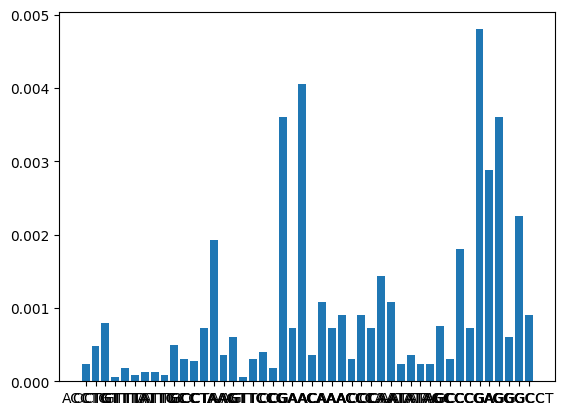

In [64]:
dna = "ACCTGTTTATTGCCTAAGTTCCGAACAAACCCAATATAGCCCGAGGGCCT"
k = 5
dic = {
    'A': [0.2,0.3,0.3,0.2,0.3],
    'C': [0.4,0.3,0.1,0.5,0.1],
    'G':[0.3,0.3,0.5,0.2,0.4],
    'T': [0.1,0.2,0.1,0.1,0.2]  
}

pmax = float("-inf")
kmer = ""
gb = {}
for i in range(len(dna)-k+1):
    subdna = dna[i:i+k]
    probability = 1
    for j in range(k):
        probability *= dic[subdna[j]][j]
    if probability > pmax:
        kmer = subdna
        pmax = probability
    gb[subdna] = probability
keys = list(gb.keys())
values = list(gb.values())

import matplotlib.pyplot as plt
plt.bar(keys,values)

### BA2D : Implement GreedyMotifSearch

In [70]:
k = 3
t = 5
dnas = [
    "GGCGTTCAGGCA",
    "AAGAATCAGTCA",
    "CAAGGAGTTCGC",
    "CACGTCAATCAC",
    "CAATAATATTCG"
]


def buildProfile(motifs,k):
    profile = [[0]*k for _ in range(4)]
    dic = {'A':0,'C':1,'G':2,'T':3}
    for motif in motifs:
        for i in range(k):
            profile[dic[motif[i]]][i] += 1

    total = len(motifs)

    for i in range(4):
        for j in range(k):
            profile[i][j] = profile[i][j]/total
    return profile

def bestKmer(dna,profile,k):
    global_max = float("-inf")
    dic = {'A':0,'C':1,'G':2,'T':3}
    kmer = ""
    for i in range(len(dna)-k+1):
        subdna = dna[i:i+k]
        prob = 1
        for j in range(k):
            prob *= profile[dic[subdna[j]]][j]
        if prob > global_max:
            global_max = prob
            kmer = subdna
    return kmer

def score(motifs,k):
    total = 0
    for i in range(k):
        dic = {'A':0,'C':0,'G':0,'T':0}
        for motif in motifs:
            dic[motif[i]] += 1
        max_val = max(dic.values())
        total += (len(motifs) - max_val)
    return total

def greedy(dnas,k,t):
    bests = []
    for dna in dnas:
        bests.append(dna[0:k])
    for i in range(len(dnas[0])-k+1):
        motif1 = dnas[0][i:i+k]
        motifs = []
        motifs.append(motif1)
        for j in range(1,t):
            profile = buildProfile(motifs,k)
            best_kmer = bestKmer(dnas[j],profile,k)
            motifs.append(best_kmer)
        if score(motifs,k) < score(bests,k):
            bests = motifs
    return bests

best = greedy(dnas,k,t)
print(best)

['CAG', 'CAG', 'CAA', 'CAA', 'CAA']


### BA2E : Implement GreedyMotifSearch with Pseudocounts

In [71]:
k = 3
t = 5
dnas = [
    "GGCGTTCAGGCA",
    "AAGAATCAGTCA",
    "CAAGGAGTTCGC",
    "CACGTCAATCAC",
    "CAATAATATTCG"
]

def buildProfile(motifs,k):
    profile = [[0]*k for _ in range(4)]
    pseudo = [[1]*k for _ in range(4)]
    dic = {'A':0,'C':1,'G':2,'T':3}
    for motif in motifs:
        for i in range(k):
            pseudo[dic[motif[i]]][i] += 1

    total = len(motifs)

    for i in range(4):
        for j in range(k):
            profile[i][j] = pseudo[i][j]/(total+4)

    return profile

def bestKmer(dna,profile,k):
    global_max = float("-inf")
    dic = {'A':0,'C':1,'G':2,'T':3}
    kmer = ""
    for i in range(len(dna)-k+1):
        subdna = dna[i:i+k]
        prob = 1
        for j in range(k):
            prob *= profile[dic[subdna[j]]][j]
        if prob > global_max:
            global_max = prob
            kmer = subdna

    return kmer

def score(motifs,k):
    total = 0
    for i in range(k):
        dic = {'A':0,'C':0,'G':0,'T':0}
        for motif in motifs:
            dic[motif[i]] += 1
        max_val = max(dic.values())
        total += (len(motifs) - max_val)

    return total

def greedy(dnas,k,t):
    bests = []
    for dna in dnas:
        bests.append(dna[0:k])
    for i in range(len(dnas[0])-k+1):
        motif1 = dnas[0][i:i+k]
        motifs = []
        motifs.append(motif1)
        for j in range(1,t):
            profile = buildProfile(motifs,k)
            best_kmer = bestKmer(dnas[j],profile,k)
            motifs.append(best_kmer)
        if score(motifs,k) < score(bests,k):
            bests = motifs
    return bests

best = greedy(dnas,k,t)
print(best)

['TTC', 'ATC', 'TTC', 'ATC', 'TTC']


### BA2F : Implement RandomizedMotifSearch

In [14]:
import random

k = 8
t = 5
dnas = [
    "CGCCCCTCTCGGGGGTGTTCAGTAAACGGCCA",
    "GGGCGAGGTATGTGTAAGTGCCAAGGTGCCAG",
    "TAGTACCGAGACCGAAAGAAGTATACAGGCGT",
    "TAGATCAAGTTTCAGGTGCACGTCGGTGAACC",
    "AATCCACCAGCTCCACGTGCAATGTTGGCCTA"
]

def genRandom(dnas,k):
    motifs = []
    for dna in dnas:
        i = random.randint(0, len(dna)-k)
        motifs.append(dna[i:i+k])
    return motifs

def buildProfile(motifs,k):
    dic = {'A':0,'C':1,'G':2,'T':3}
    profile = [[0]*k for _ in range(4)]
    pseudo = [[1]*k for _ in range(4)]

    for motif in motifs:
        for i in range(k):
            pseudo[dic[motif[i]]][i] += 1

    for i in range(4):
        for j in range(k):
            profile[i][j] = pseudo[i][j]/(len(motifs)+4)

    return profile

def probableKmers(dnas,profile,k):
    motifs = []
    dic = {'A':0,'C':1,'G':2,'T':3}

    for dna in dnas:
        gmax = float("-inf")
        kmer = ""
        for i in range(len(dna)-k+1):
            subdna = dna[i:i+k]
            prob = 1
            for j in range(k):
                prob *= profile[dic[subdna[j]]][j]
            if prob > gmax:
                gmax = prob
                kmer = subdna
        motifs.append(kmer)

    return motifs

def score(motifs,k):
    total = 0
    l = len(motifs)

    for i in range(k):
        dic = {'A':0,'C':0,'G':0,'T':0}
        for motif in motifs:
            dic[motif[i]] += 1
        max_val = max(dic.values())
        total += (l-max_val)
        
    return total

def motifSearch(dnas,k):
    bests = randoms = genRandom(dnas,k)
    while True:
        profile = buildProfile(randoms,k)
        randoms = probableKmers(dnas,profile,k)
        if score(randoms,k) < score(bests,k):
            bests = randoms
        else:
            return bests

def randomSearch(dnas,k,iter):
    bests = motifSearch(dnas,k)
    
    for _ in range(iter-1):
        another = motifSearch(dnas,k)
        if score(another,k) < score(bests,k):
            bests = another
    return bests  

bests = randomSearch(dnas,k,1000)
print(bests)

['TCTCGGGG', 'CCAAGGTG', 'TACAGGCG', 'TTCAGGTG', 'TCCACGTG']


### BA3H : Implement DistanceBetweenPatternAndStrings

In [18]:
pattern = "AAA"
texts = ['TTACCTTAAC','GATATCTGTC','ACGGCGTTCG','CCCTAAAGAG','CGTCAGAGGT']

def findDistance(pattern,texts):
    total = 0
    k = len(pattern)
    for text in texts:
        gmin = float("inf")
        for i in range(len(text)-k+1):
            sub = text[i:i+k]
            d = hamming(sub,pattern)
            if d < gmin:
                gmin = d
        total += gmin
    return total


distance = findDistance(pattern,texts)
print(distance)

5


### BA3D : Construct the De Bruijn Graph of a String

In [68]:
k = 4
string = "AAGATTCTCTAC"

def debrujin(string,k):
    dic = {}

    for i in range(len(string)-k+1):
        substring = string[i:i+k]
        prefix = substring[:-1]
        suffix = substring[1:]

        if prefix not in dic:
            dic[prefix] = []
        dic[prefix].append(suffix)

    return dic

result = debrujin(string,k)
result = sorted(result.items(), key=lambda c: c[0])
result = {key:value for key,value in result}

for key, value in result.items():
    print(key,'->',','.join(value))

AAG -> AGA
AGA -> GAT
ATT -> TTC
CTA -> TAC
CTC -> TCT
GAT -> ATT
TCT -> CTC,CTA
TTC -> TCT


### BA3E : Construct the De Bruijn Graph of a Collection of k-mers

In [69]:
kmers = [
    "GAGG",
    "CAGG",
    "GGGG",
    "GGGA",
    "CAGG",
    "AGGG",
    "GGAG"
]

def debrujin(kmers):
    dic = {}
    for kmer in kmers:
        prefix = kmer[:-1]
        suffix = kmer[1:]
        
        if prefix not in dic:
            dic[prefix] = []
        dic[prefix].append(suffix)
    return dic

result = debrujin(kmers)
for key,value in result.items():
    print(key,"->",",".join(value))

GAG -> AGG
CAG -> AGG,AGG
GGG -> GGG,GGA
AGG -> GGG
GGA -> GAG


### BA3F : Find an Eulerian Cycle in a Graph 

In [27]:
graph = {
    0: [3],
    1: [0],
    2: [1,6],
    3: [2],
    4: [2],
    5: [4],
    6: [5,8],
    7: [9],
    8: [7],
    9: [6]
}

def eulerCycle(graph):
    indegrees = {}
    outdegrees = {}
    
    for node,key in graph.items():
        outdegrees[node] = outdegrees.get(node,0) + len(key)
        for neighbor in key:
            indegrees[neighbor] = indegrees.get(neighbor,0) + 1
            
    for node in graph.keys():
        if outdegrees[node] != indegrees[node]:
            return "No euler cycle"
        
    return "Euler cycle exists"

result = eulerCycle(graph)
print(result)

Euler cycle exists


### BA3G : Find an Eulerian Path in a Graph

In [31]:
def euler_start(graph):
    indegs = {}
    outdegs = {}

    for node, keys in graph.items():
        outdegs[node] = outdegs.get(node,0) + len(keys)
        for n in keys:
            indegs[n] = indegs.get(n,0) + 1
    start = None
    end = None

    for node,val in outdegs.items():
        if node not in indegs or indegs[node] < val:
            start = node
            break

    for node,val in indegs.items():
        if node not in outdegs or outdegs[node]<val:
            end = node
            break
        
    return start

graph = {
    0: [2],
    1: [3],
    2: [1],
    3: [0, 4],
    6: [3, 7],
    7: [8],
    8: [9],
    9: [6]
}

def dfs(graph,start,s):
    if start in graph:
        neighbors = list(graph[start])
        for neighbor in neighbors:
            if neighbor in graph[start]:
                graph[start].remove(neighbor)
                s = dfs(graph,neighbor,s)
    s += str(start)
    return s
                

start = euler_start(graph)
result = dfs(graph,start,"")
result = result[::-1]
ans = result[0]
for i in result[1:]:
    ans+='->'+i
print(ans)

6->7->8->9->6->3->0->2->1->3->4


### BA4B : Find Substrings of a Genome Encoding a Given Amino Acid String

In [72]:
from Bio.Seq import Seq
dna = "ATGGCCATGGCCCCCAGAACTGAGATCAATAGTACCCGTATTAACGGGTGA"
text = "MA" 

k = len(text)*3

for i in range(len(dna)-k+1):
    subdna = dna[i:i+k]
    if Seq(subdna).translate() == text or Seq(subdna).reverse_complement().translate() == text:
        print(subdna)

ATGGCC
GGCCAT
ATGGCC


<BarContainer object of 14 artists>

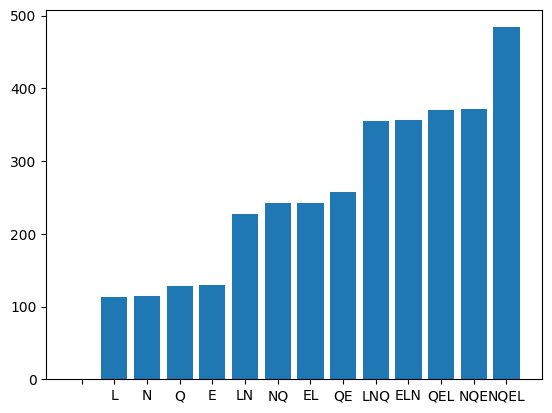

In [73]:
from Bio.Seq import Seq
import matplotlib.pyplot as plt

peptide = "NQEL"

mass_table =  {
    '': 0,
    'G': 57,
    'A': 71,
    'S': 87,
    'P': 97,
    'V': 99,
    'T': 101,
    'C': 103,
    'I': 113,
    'L': 113,
    'N': 114,
    'D': 115,
    'K': 128,
    'Q': 128,
    'E': 129,
    'M': 131,
    'H': 137,
    'F': 147,
    'R': 156,
    'Y': 163,
    'W': 186
}
seqs = [""] # empty is also valid

def generateAll(peptide2):
    for ln in range(1,len(peptide)):
        for index in range(len(peptide)):
            seqs.append(peptide2[index:index+ln])



generateAll(peptide+peptide)

seqs.append(peptide) # peptide is also valid. Remember it

def calculateMass(seq):
    total = 0
    for s in seq:
        total += mass_table[s]
    return total

seq_and_mass = {}
for seq in seqs:
    mass = calculateMass(seq)
    seq_and_mass[seq] = mass

seq_and_mass = sorted(seq_and_mass.items(), key=lambda c: c[1])
seq_and_mass = {key: val for key,val in seq_and_mass}
keys = list(seq_and_mass.keys())
values = list(seq_and_mass.values())
plt.bar(keys,values)

### BA4D : Compute the Number of Peptides of Given Total Mass

In [74]:
def total_ways(mass, mass_table):
    dp = [0]*(mass+1)
    dp[0] = 1
    m = len(mass_table)

    for i in range(mass+1):
        cursum = 0
        for j in range(m):
            if i - mass_table[j] >= 0:
                cursum += dp[i-mass_table[j]]
        dp[i] += cursum
    return dp[mass]

mass_table =  {
    'G': 57,
    'A': 71,
    'S': 87,
    'P': 97,
    'V': 99,
    'T': 101,
    'C': 103,
    'I': 113,
    'L': 113,
    'N': 114,
    'D': 115,
    'K': 128,
    'Q': 128,
    'E': 129,
    'M': 131,
    'H': 137,
    'F': 147,
    'R': 156,
    'Y': 163,
    'W': 186
}

masses = [value for key,value in mass_table.items()]
masses = list(set(masses))

mass = 1024


result = total_ways(mass,masses)
print(result)

14712706211


### BA4F : Compute the Score of a Cyclic Peptide Against a Spectrum

In [62]:
mass_table =  {
    '': 0,
    'G': 57,
    'A': 71,
    'S': 87,
    'P': 97,
    'V': 99,
    'T': 101,
    'C': 103,
    'I': 113,
    'L': 113,
    'N': 114,
    'D': 115,
    'K': 128,
    'Q': 128,
    'E': 129,
    'M': 131,
    'H': 137,
    'F': 147,
    'R': 156,
    'Y': 163,
    'W': 186
}
peptide = "NQEL"
massList = [0, 99, 113, 114, 128, 227, 257, 299, 355, 356, 370, 371, 484]

seqs = [""]

def generateAll(peptide2):
    for l in range(1,len(peptide)):
        for ind in range(len(peptide)):
            seqs.append(peptide2[ind:ind+l])

generateAll(peptide+peptide)
seqs.append(peptide)
masses = []
for seq in seqs:
    total = 0
    for s in seq:
        total += mass_table[s]
    masses.append(total)

count = 0

for mass in massList:
    if mass in masses:
        count += 1
print(count)


11
